## Octoberfest
### Quick analysis using Pandas, Matplotlib, and Plotly

This tutorial uses [data](https://www.opengov-muenchen.de/tr/dataset/oktoberfest) from Octoberfest and follows along with a Medium - Towards Data Science [article](https://towardsdatascience.com/oktoberfest-quick-analysis-using-pandas-matplotlib-and-plotly-79778367a4c).

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# Load data into a pandas dataframe
df_oktoberfest = pd.read_csv('oktoberfestgesamt19852018.csv')

# Print the first 5 rows of the dataframe
df_oktoberfest.head()

,jahr,dauer,besucher_gesamt,besucher_tag,bier_preis,bier_konsum,hendl_preis,hendl_konsum
0,1985,16,7.1,444,3.20,54541,4.77,629520
1,1986,16,6.7,419,3.30,53807,3.92,698137
2,1987,16,6.5,406,3.37,51842,3.98,732859
3,1988,16,5.7,356,3.45,50951,4.19,720139
4,1989,16,6.2,388,3.60,51241,4.22,775674


### Exploratory data analysis and data cleaning

In [2]:
# Checking for inappropriate data types and missing values
df_oktoberfest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 8 columns):
jahr               34 non-null int64
dauer              34 non-null int64
besucher_gesamt    34 non-null float64
besucher_tag       34 non-null int64
bier_preis         34 non-null float64
bier_konsum        34 non-null int64
hendl_preis        34 non-null float64
hendl_konsum       34 non-null int64
dtypes: float64(3), int64(5)
memory usage: 2.2 KB


In [3]:
# Alternative ways to check data
# Check if the data set contains null values (Alternative 1)
df_oktoberfest.isnull().sum().any()
# False, meaning there are not null values

# Check if the data set contains null values (Alternatie 2)
sum(df_oktoberfest.count()-len(df_oktoberfest))
# 0, meaning ther are not null values

0

In [4]:
# Check column types
df_oktoberfest.dtypes

jahr                 int64
dauer                int64
besucher_gesamt    float64
besucher_tag         int64
bier_preis         float64
bier_konsum          int64
hendl_preis        float64
hendl_konsum         int64
dtype: object

In [5]:
# The dataset does not contain null values and the data types are the expected ones;
# therefore, there is no major data cleaning required; 
# however, we can perform some minor changes to make it easier.

# Drop the column besucher_tag (visitors per day)
df_oktoberfest.drop("besucher_tag", axis=1, inplace=True)

# Translate columns names into english
german_to_english = {'jahr':'year', 'dauer':'duration', 'besucher_gesamt':'visitors_total', 
                    'bier_preis':'beer_price', 'bier_konsum':'beer_consumption', 'hendl_preis':'chicken_price',
                    'hendl_konsum':'chicken_consumption'}
df_oktoberfest.rename(columns=german_to_english, inplace=True)

# Set year as the index of the dataframe
df_oktoberfest.set_index('year', inplace=True)

df_oktoberfest.head()

,duration,visitors_total,beer_price,beer_consumption,chicken_price,chicken_consumption
year,,,,,,
1985,16,7.1,3.20,54541,4.77,629520
1986,16,6.7,3.30,53807,3.92,698137
1987,16,6.5,3.37,51842,3.98,732859
1988,16,5.7,3.45,50951,4.19,720139
1989,16,6.2,3.60,51241,4.22,775674


### Answering questions and drawing conclusions

#### How did beer price change over the last 33 years? And chicken price? Is there a trend?
Answer: The prices have increased steadily.

Text(0.5, 1.0, 'Evolution of prices from 1985 to 2018')

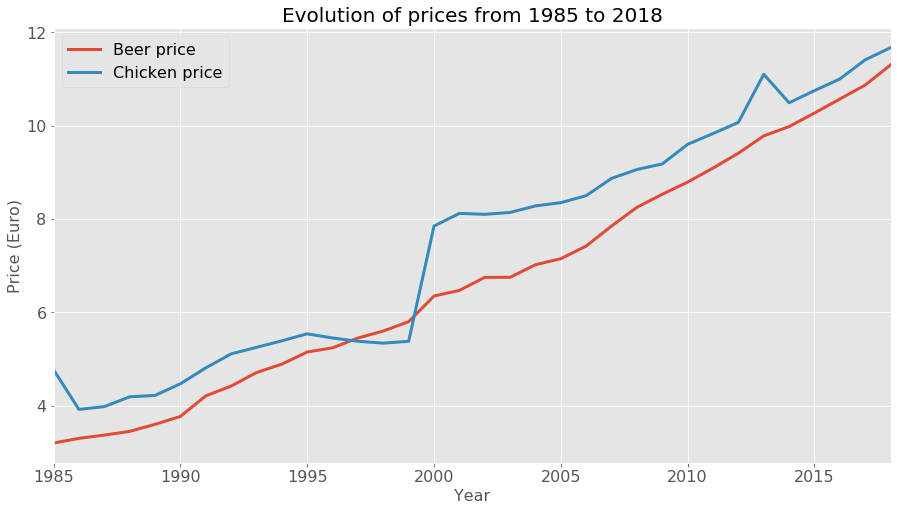

In [6]:
# Plot beer price and chicken price
df_oktoberfest.plot(kind = 'line', y=['beer_price','chicken_price'], figsize=(15,8), linewidth=3, fontsize=16)

# Title, labels and legend
plt.legend(labels=['Beer price','Chicken price'], fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price (Euro)', fontsize=16)
plt.title('Evolution of prices from 1985 to 2018', fontsize=20)


In [7]:
# Price of a beer and a chicken in 1985
print(df_oktoberfest.loc[1985,['beer_price','chicken_price']].sum())
# 7.97

# Price of a beer and a chicken in 2018
print(df_oktoberfest.loc[2018,['beer_price','chicken_price']].sum())
# 22.97

7.97
22.97


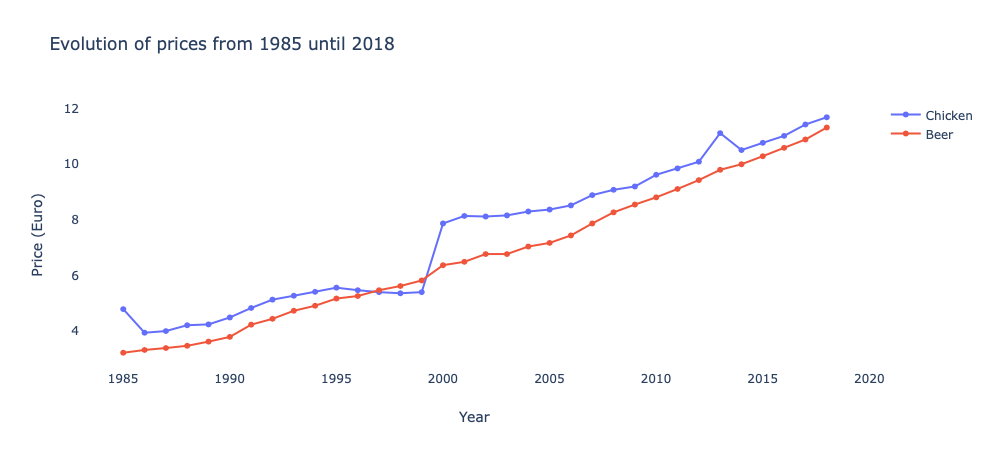

In [8]:
# Interactive plot using Plotly
import plotly.graph_objects as go
import plotly
plotly.offline.iplot

# Interactive plots of the price of beer and chicken
year = df_oktoberfest.index
beer_price = df_oktoberfest.beer_price
chicken_price = df_oktoberfest.chicken_price

fig = go.Figure()

fig.add_trace(go.Scatter(x=year, y=chicken_price,
                    mode='lines+markers',
                    name='Chicken'))

fig.add_trace(go.Scatter(x=year, y=beer_price,
                    mode='lines+markers',
                    name='Beer'))

# Title, labels, and background
fig.update_layout(title='Evolution of prices from 1985 until 2018',
                   xaxis_title='Year',
                   yaxis_title='Price (Euro)',
                   plot_bgcolor='white')

### How did beer consumption change from 1985 to 2018? and chicken consumption? Is there a trend?

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x1212ec9b0> has a label of '_nolegend_' which cannot be automatically added to the legend.



Text(0.5, 1.0, 'Consumption of bier')

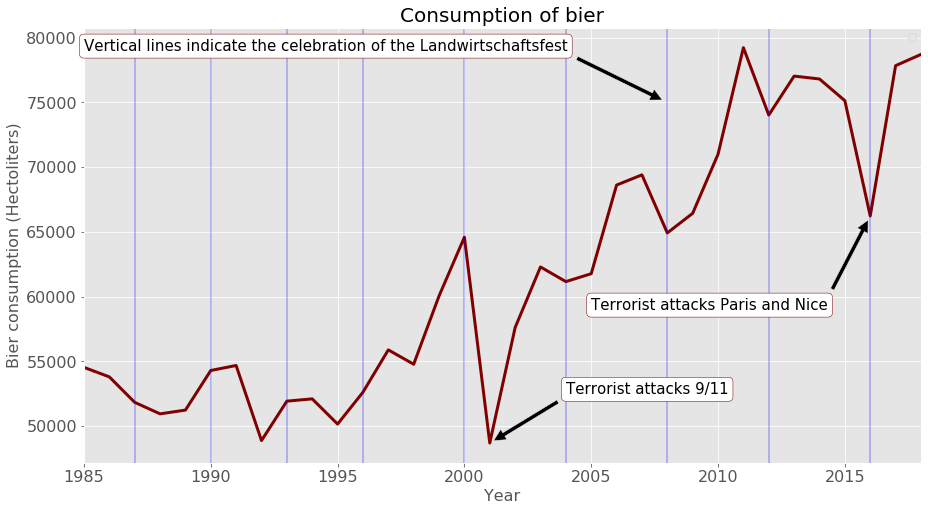

In [9]:
# Plot beer consumption
df_oktoberfest.plot(y='beer_consumption', figsize=(15,8), linewidth=3, fontsize=16, color='maroon', label='_nolegend_')

# Years Landwirtschaftsfest
years_landwirtschaftsfest = [1987, 1990, 1993, 1996, 2000, 2004, 2008, 2012, 2016]

# Plot vertical line, indicating the celebration of the Landwirtschaftsfest. 
for year in years_landwirtschaftsfest:
    plt.axvline(x=year, color='blue', alpha=0.3)


# Annotations - celebration of the landwirtschaftsfest and terrorist attacks  
plt.annotate('Vertical lines indicate the celebration of the Landwirtschaftsfest', xy=(2008, 75000), xytext=(1985, 79000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )
plt.annotate('Terrorist attacks 9/11', xy=(2001, df_oktoberfest.loc[2001,'beer_consumption']), xytext=(2004, 52500), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )
plt.annotate('Terrorist attacks Paris and Nice', xy=(2016, df_oktoberfest.loc[2016,'beer_consumption']), xytext=(2005, 59000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="maroon"),
            )

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Bier consumption (Hectoliters)',fontsize=16)
plt.title('Consumption of bier',fontsize=20)

In [10]:
# Lowest number of visitors since 1985 in 2001,2016, and 1988. 
df_oktoberfest.visitors_total.sort_values().head(3)

year
2001    5.5
2016    5.6
1988    5.7
Name: visitors_total, dtype: float64

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x11d9a6a90> has a label of '_nolegend_' which cannot be automatically added to the legend.



Text(0.5, 1.0, 'Consumption of chicken')

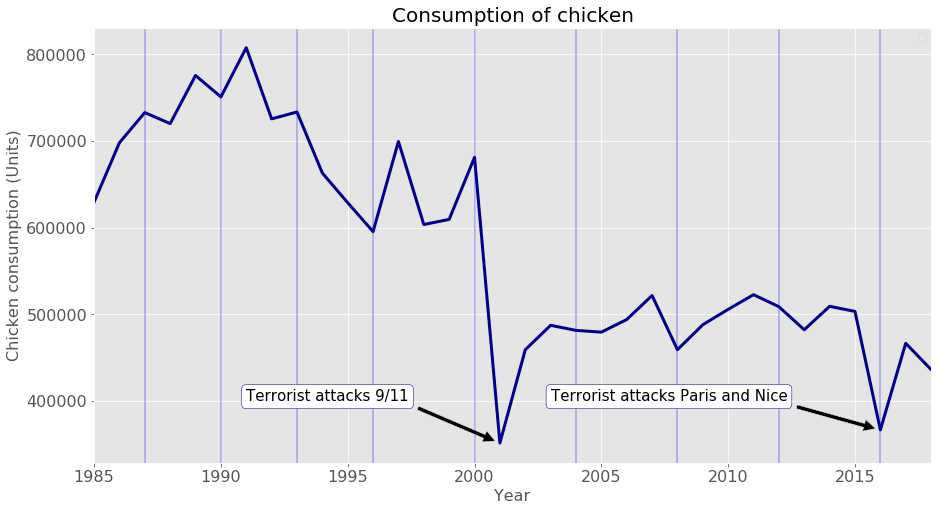

In [11]:
df_oktoberfest.plot(y='chicken_consumption', figsize=(15,8), linewidth=3, fontsize=16, color='darkblue', label='_nolegend_')

# Years Landwirtschaftsfest
years_landwirtschaftsfest = [1987, 1990, 1993, 1996, 2000, 2004, 2008, 2012, 2016]

# Plot vertical line, indicating the celebration of the Landwirtschaftsfest. 
for year in years_landwirtschaftsfest:
    plt.axvline(x=year, color='blue', alpha=0.3)


# Annotations - terrorist attacks of September 11, Paris and Nice
plt.annotate('Terrorist attacks 9/11', xy=(2001, df_oktoberfest.loc[2001,'chicken_consumption']), xytext=(1991, 400000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="darkblue"),
            )
plt.annotate('Terrorist attacks Paris and Nice', xy=(2016, df_oktoberfest.loc[2016,'chicken_consumption']), xytext=(2003, 400000), fontsize=15,
            arrowprops=dict(facecolor='black', shrink=0.05),bbox = dict(boxstyle="round", fc="w",ec="darkblue"),
            )

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Chicken consumption (Units)',fontsize=16)
plt.title('Consumption of chicken',fontsize=20)

### How did the number of visitors change from 1985 till 2018? Is there a trend?

//anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:575: UserWarning:

The handle <matplotlib.lines.Line2D object at 0x11d9e58d0> has a label of '_nolegend_' which cannot be automatically added to the legend.



Text(0.5, 1.0, 'Total number of visitors')

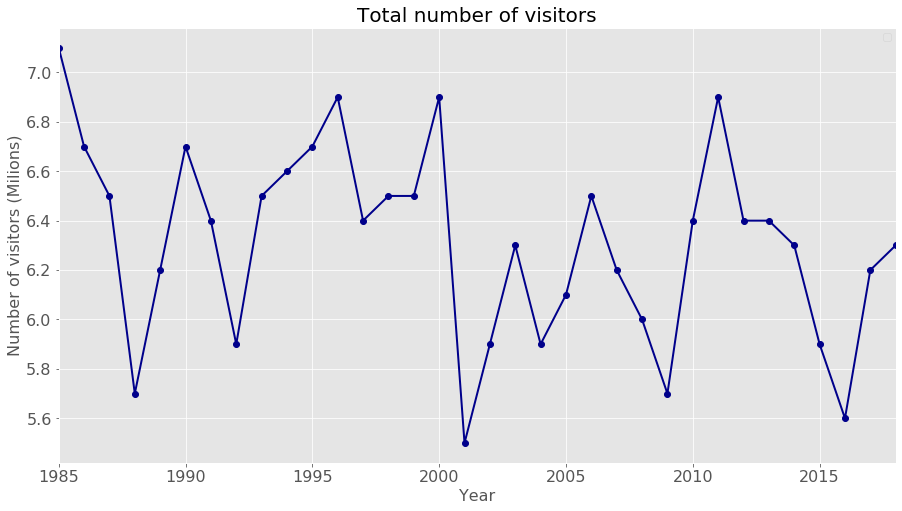

In [12]:
# Plot total number of visitors
df_oktoberfest.plot(y='visitors_total', figsize=(15,8), marker='o', linewidth=2, fontsize=16, color='darkblue', label='_nolegend_')

# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number of visitors (Milions)',fontsize=16)
plt.title('Total number of visitors',fontsize=20)

### Is the price of beer also increasing in other folk festivals in Bavaria?
There is an [article](https://www.merkur.de/bayern/so-viel-kostet-mass-auf-bayerischen-volksfesten-7428217.html) that contains information about 8 different folk festivals in Bavaria.

The table includes: (1) Name of the festival, (2) Date of the festival, (3) Number of visitors, (4) Organizer, (5) Information about beer price, and (6) Beer price evolution from 2008 until 2016.

In [13]:
article = pd.read_html('https://www.merkur.de/bayern/so-viel-kostet-mass-auf-bayerischen-volksfesten-7428217.html',header=0)
df_feste = article[0]

df_feste 

,Fest,Termin 2017,Besucher,Veranstalter,Bierpreisbremse,Bierpreis-Entwicklung
0,Bergkirchweih Erlangen,1.6. – 12.6.,"1,3 Mio.",Stadt Erlangen,Nein. Bierpreise für die vielen verschiedenen ...,"2008: 7,00 € 2009: 7,00 € 2010: 7,50 € 2011..."
1,Augsburger Plärrer,14.4. – 1.5. und 25.8. – 10.9.,"insgesamt 1,2 Mio. an beiden Terminen",Stadt Augburg,"Nein, kein Thema. Brauereien teilen den Preis ...","2008: 6,40 € 2009: 6,40 € 2010: 6,70 € 2011..."
2,Barthelmarkt Oberstimm,26.6. - 28.8.,200.000,Markt Manching,Keine Auskunft. Festwirte und Brauereien kalku...,"2008: 6,70 € 2009: 6,90 € 2010: 6,90 € 2011..."
3,Dachauer Volksfest,12.8. - 21.8.,300.000,Stadt Dachau,Nein. Wirte machen alle zwei Jahre der Stadt e...,"2008: 4,40 € 2009: 4,70 € 2010: 4,90 € 2011..."
4,Herbstfest Rosenheim,26.8. - 10.9.,"1,1 Mio.",Wirtschaftlicher Verband Rosenheim,Nicht geplant. Zwei Brauereien sind auf dem He...,"2008: 6,60 € 2009: 6,80 € 2010: 7,40 € 2011..."
5,Gillamoos Abensberg,31.8. - 4.9.,300.000,Stadt Abensberg,"Kein Thema, die auf dem Gillamoos vertretenen ...","2012: 7,90 € 2013: 7,90 € 2014: 8,40 € 2015..."
6,Gäubodenfest Straubing,11.8. - 21.8.,"1,4 Mio.",Ausstellungs- und Veranstaltungs GmbH,Nein. Brauereien kalkulieren den Preis und der...,"2008: 6,80 € 2009: 6,80 € 2010: 7,40 € 2011..."
7,Karpfhamer Fest,31.8. - 5.9.,400.000,Eingetragener Verein,Nein. Absprachen unter den Wirten über den Bie...,"2008: 6,80 € 2009: 6,80 € 2010: 7,40 € 2011..."


In [20]:
# We are only interested in analyzing beer prices, thus we can create a data frame that only 
# contains the prices available in the last column.

import re

# Data will be a list of dictionaries
data = []

# Loop through all entries in Bierpreis-Entwicklung (Evolution of beer prices) column
for entry in df_feste['Bierpreis-Entwicklung']:
    # Find all 4-digits patterns
    years = re.findall('\d{4}',entry)
    # Find one or more digits follow by a , and follow by another one or more digits
    prices = re.findall('\d+,\d+',entry)
    
    # Create a dictionary, where years are the keys and prices the values
    dictionary = dict(zip(years,prices))
    # Append this dictionary to the list data
    data.append(dictionary)
    

# Use the list data to create the dataframe
df_feste_price = pd.DataFrame(data,index=df_feste['Fest'])

df_feste_price

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Fest,,,,,,,,,
Bergkirchweih Erlangen,"7,00","7,00","7,50","7,50","7,50","8,00","8,00","8,50","9,00"
Augsburger Plärrer,"6,40","6,40","6,70","6,80","7,30","8,20","8,40","8,40","9,60"
Barthelmarkt Oberstimm,"6,70","6,90","6,90","7,40","7,70","7,90","8,20","8,40","9,40"
Dachauer Volksfest,"4,40","4,70","4,90","4,90","5,10","5,30","5,60","5,60","5,70"
Herbstfest Rosenheim,"6,60","6,80","7,40","7,40","7,80","7,80","8,20","8,40","8,40"
Gillamoos Abensberg,NaN,NaN,NaN,NaN,"7,90","7,90","8,40","8,90","8,90"
Gäubodenfest Straubing,"6,80","6,80","7,40","7,40","7,90","8,10","8,40","8,70","8,90"
Karpfhamer Fest,"6,80","6,80","7,40","7,40","7,90","8,10","8,40","8,70","8,90"


In [21]:
# Modify the data types of all columns to be floats instead of strings
for year in map(str,range(2008,2017)):
    df_feste_price[year] = df_feste_price[year].str.replace(',','.').astype(float)

# Transpose the dataframe
df_feste_price = df_feste_price.transpose()

# Include price of beer at Oktoberfest from 2008 till 2016
df_feste_price['Oktoberfest'] = list(df_oktoberfest.loc[2008:2016,'beer_price'])

df_feste_price

Fest,Bergkirchweih Erlangen,Augsburger Plärrer,Barthelmarkt Oberstimm,Dachauer Volksfest,Herbstfest Rosenheim,Gillamoos Abensberg,Gäubodenfest Straubing,Karpfhamer Fest,Oktoberfest
2008,7.0,6.4,6.7,4.4,6.6,NaN,6.8,6.8,8.25
2009,7.0,6.4,6.9,4.7,6.8,NaN,6.8,6.8,8.53
2010,7.5,6.7,6.9,4.9,7.4,NaN,7.4,7.4,8.79
2011,7.5,6.8,7.4,4.9,7.4,NaN,7.4,7.4,9.09
2012,7.5,7.3,7.7,5.1,7.8,7.9,7.9,7.9,9.41
2013,8.0,8.2,7.9,5.3,7.8,7.9,8.1,8.1,9.78
2014,8.0,8.4,8.2,5.6,8.2,8.4,8.4,8.4,9.98
2015,8.5,8.4,8.4,5.6,8.4,8.9,8.7,8.7,10.27
2016,9.0,9.6,9.4,5.7,8.4,8.9,8.9,8.9,10.57


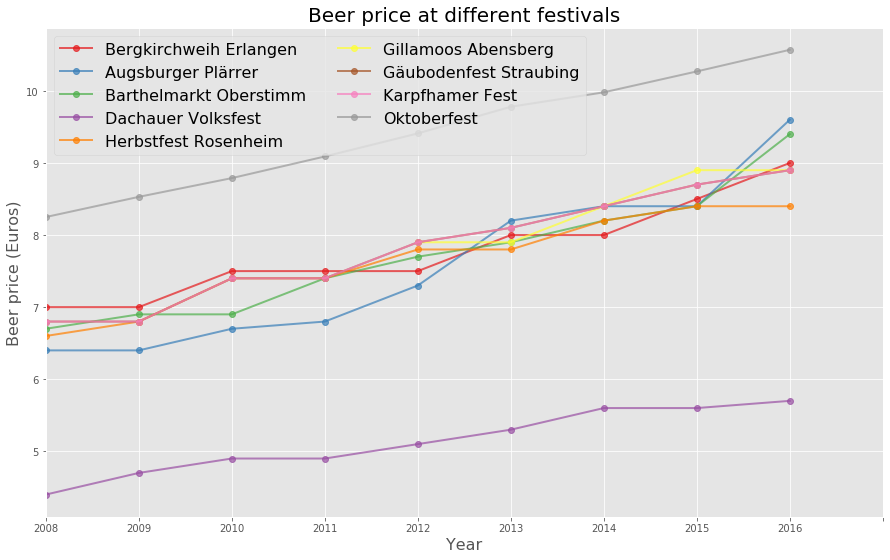

In [22]:
import numpy as np

df_feste_price.plot(figsize=(15,9), cmap=plt.get_cmap('Set1'), marker='o', linewidth=2, alpha=0.7)

# Xticks
plt.xticks(np.arange(10), df_feste_price.index)
# Title and labels
plt.xlabel('Year',fontsize=16)
plt.ylabel('Beer price (Euros)',fontsize=16)
plt.title('Beer price at different festivals',fontsize=20)
plt.legend(loc='best',ncol=2,fontsize=16)

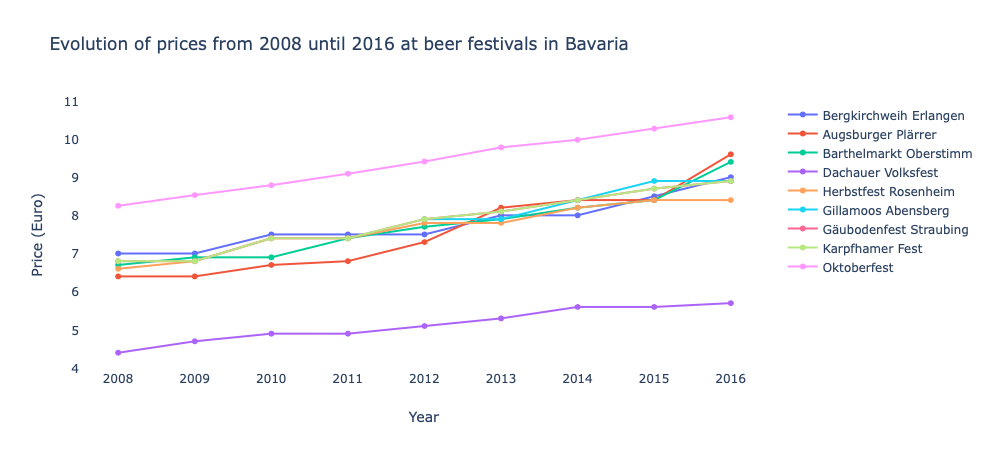

In [23]:
# Interactive plots of the price of beer and chicken
year = df_feste_price.index

fig = go.Figure()

for column in df_feste_price.columns:
    fig.add_trace(go.Scatter(x=year, y=df_feste_price[column],
                        mode='lines+markers',
                        name=column,
                        hoverinfo="y"))

# Title and labels
fig.update_layout(title='Evolution of prices from 2008 until 2016 at beer festivals in Bavaria',
                   xaxis_title='Year',
                   yaxis_title='Price (Euro)',
                   plot_bgcolor='white')

In [24]:
# Percentage change between the year and the prior year
price_pct_change = df_feste_price.pct_change()

# Calculate the mean percentage of change 
price_pct_change.loc['mean'] = price_pct_change.mean(axis=0)

price_pct_change

Fest,Bergkirchweih Erlangen,Augsburger Plärrer,Barthelmarkt Oberstimm,Dachauer Volksfest,Herbstfest Rosenheim,Gillamoos Abensberg,Gäubodenfest Straubing,Karpfhamer Fest,Oktoberfest
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,0.000000,0.000000,0.029851,0.068182,0.030303,NaN,0.000000,0.000000,0.033939
2010,0.071429,0.046875,0.000000,0.042553,0.088235,NaN,0.088235,0.088235,0.030481
2011,0.000000,0.014925,0.072464,0.000000,0.000000,NaN,0.000000,0.000000,0.034130
2012,0.000000,0.073529,0.040541,0.040816,0.054054,NaN,0.067568,0.067568,0.035204
2013,0.066667,0.123288,0.025974,0.039216,0.000000,0.000000,0.025316,0.025316,0.039320
2014,0.000000,0.024390,0.037975,0.056604,0.051282,0.063291,0.037037,0.037037,0.020450
2015,0.062500,0.000000,0.024390,0.000000,0.024390,0.059524,0.035714,0.035714,0.029058
2016,0.058824,0.142857,0.119048,0.017857,0.000000,0.000000,0.022989,0.022989,0.029211
mean,0.032427,0.053233,0.043780,0.033153,0.031033,0.030704,0.034607,0.034607,0.031474


In [26]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")

latitude = []
longitude =[]
cities = ['Erlangen','Augsburg','Oberstimm','Dachau','Rosenheim','Abensberg','Straubing','Karpfham','Munich']

# Find the latitude and longitude of the different cities using geolocator
for city in cities:
    location = geolocator.geocode(city)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

# Transpose again the data frame df_feste_price, since we want the festivals to be the index of the dataframe
df_feste_price = df_feste_price.transpose()
# Create a dataframe using the lists created before - latitude and longitude
df_locations = pd.DataFrame({'latitude':latitude, 'longitude':longitude}, index=df_feste_price.index)

# Concatenate both data frames 
df_feste_locations = pd.concat([df_feste_price, df_locations],axis=1)

df_feste_locations

,2008,2009,2010,2011,2012,2013,2014,2015,2016,latitude,longitude
Fest,,,,,,,,,,,
Bergkirchweih Erlangen,7.00,7.00,7.50,7.50,7.50,8.00,8.00,8.50,9.00,49.598119,11.003645
Augsburger Plärrer,6.40,6.40,6.70,6.80,7.30,8.20,8.40,8.40,9.60,48.366804,10.898697
Barthelmarkt Oberstimm,6.70,6.90,6.90,7.40,7.70,7.90,8.20,8.40,9.40,48.712309,11.456664
Dachauer Volksfest,4.40,4.70,4.90,4.90,5.10,5.30,5.60,5.60,5.70,48.259248,11.435442
Herbstfest Rosenheim,6.60,6.80,7.40,7.40,7.80,7.80,8.20,8.40,8.40,47.853927,12.127262
Gillamoos Abensberg,NaN,NaN,NaN,NaN,7.90,7.90,8.40,8.90,8.90,48.816700,11.850000
Gäubodenfest Straubing,6.80,6.80,7.40,7.40,7.90,8.10,8.40,8.70,8.90,48.881980,12.569716
Karpfhamer Fest,6.80,6.80,7.40,7.40,7.90,8.10,8.40,8.70,8.90,48.419987,13.214208
Oktoberfest,8.25,8.53,8.79,9.09,9.41,9.78,9.98,10.27,10.57,48.137108,11.575382


In [27]:
# Melt the dataframe 
data = pd.melt(df_feste_locations.reset_index(),
               id_vars=['Fest','latitude','longitude'], 
               value_vars=list(map(str,range(2008,2017))),
               var_name='year', value_name='price', )

# Drop rows with null values
data.dropna(inplace=True)

# Visualize the first 10 rows
data.head(10)

,Fest,latitude,longitude,year,price
0,Bergkirchweih Erlangen,49.598119,11.003645,2008,7.00
1,Augsburger Plärrer,48.366804,10.898697,2008,6.40
2,Barthelmarkt Oberstimm,48.712309,11.456664,2008,6.70
3,Dachauer Volksfest,48.259248,11.435442,2008,4.40
4,Herbstfest Rosenheim,47.853927,12.127262,2008,6.60
6,Gäubodenfest Straubing,48.881980,12.569716,2008,6.80
7,Karpfhamer Fest,48.419987,13.214208,2008,6.80
8,Oktoberfest,48.137108,11.575382,2008,8.25
9,Bergkirchweih Erlangen,49.598119,11.003645,2009,7.00
10,Augsburger Plärrer,48.366804,10.898697,2009,6.40


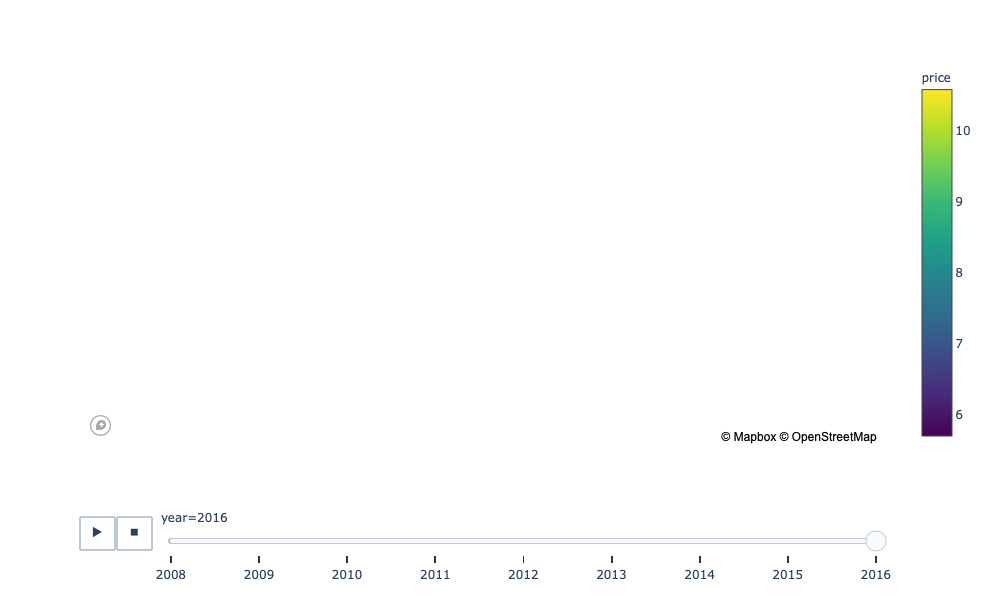

In [33]:
import plotly.express as px

# Create a token in mapbox
token = 'pk.eyJ1Ijoia2VsbGllLWNvcm9uYSIsImEiOiJjazFrdW9kcTQwc3d6M3FxN2gzczlicHd1In0.-7FzJKorNFJH5o6Gegu-fg'

# Create a scatter map plot. The size of the points represents the price
fig = px.scatter_mapbox(data,
        lat = 'latitude',
        lon = 'longitude',
        zoom=6,
        hover_name='Fest',       
        size='price',
        color='price',
        animation_frame='year',
        color_continuous_scale=px.colors.sequential.Viridis,
        )
# Configure the style of the map
fig.update_layout(
        mapbox_style="light", 
        mapbox_accesstoken=token
    )
fig.show()

### What are beer prices this year at most popular tents?

In [36]:
article = pd.read_html('https://www.oktoberfesttours.travel/oktoberfest-2019/beer-prices/',header=0)
df_brand_prices = article[0]

# Large tents prices at Oktoberfest 2019
large_tents = df_brand_prices.iloc[0:13,:]

# Change columns names
large_tents.rename(columns=lambda x:x.lower().replace(' ','_'), inplace=True)

# Change columns types - convert strings in floats
for column in large_tents.columns[1:]:
    large_tents[column] = large_tents[column].str.extract(r'(\d+.\d+)').astype(float)

# Set index of the data frame --> large tents
large_tents.set_index('large_tents', inplace=True)

# Clean dataframe
large_tents

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,2019_price,2018_price,increase
large_tents,,,
Armbrustschützenzelt,11.70,11.40,2.63
Augustiner-Festhalle,11.40,11.10,2.70
Bräurosl,11.80,11.40,3.51
Fischer-Vroni,11.70,11.35,3.08
Hacker-Festzelt,11.80,11.40,3.51
Hofbräu-Festzelt,11.70,11.40,2.63
Käfer Wiesnschänke,11.80,11.50,2.61
Löwenbräu-Festzelt,11.80,11.50,2.61
Marstall,11.80,11.50,2.61


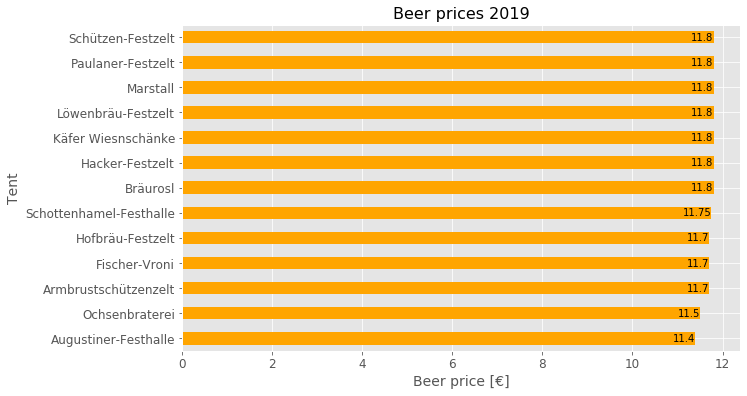

In [37]:
# Plot beer prices 2019
large_tents['2019_price'].sort_values().plot(figsize=(10,6),kind='barh',color='orange',fontsize=12)

# labels and title
plt.title('Beer prices 2019', fontsize=16)
plt.xlabel('Beer price [€]', fontsize=14)
plt.ylabel('Tent', fontsize=14)

# Text with the prices
for i,price in enumerate(large_tents['2019_price'].sort_values()):
    plt.text(x=price,y=i,s=str(price),horizontalalignment='right',verticalalignment='center')

In [39]:
from sklearn.linear_model import LinearRegression

# Prediction of beer price
# Create a LinearRegression object
beer_regression = LinearRegression()

# Fit the model 
beer_regression.fit(X=np.array(df_oktoberfest.index).reshape(-1, 1),y=df_oktoberfest.beer_price)

# Prediction using the linear model
print('Predicted beer price in 2030: {:0.3f}€'.format(beer_regression.predict(np.array([[2030]]))[0]))
# Predicted beer price in 2030: 13.781€


# Prediction of chicken price
# Create a LinearRegression object
chicken_regression = LinearRegression()

# Fit the model
chicken_regression.fit(X=np.array(df_oktoberfest.index).reshape(-1,1), y=df_oktoberfest.chicken_price)

# Prediction using the linear model
print('Predicted chicken price in 2030: {:0.3f}€'.format(chicken_regression.predict(np.array([[2030]]))[0]))
# Predicted chicken price in 2030: 14.550€

Predicted beer price in 2030: 13.781€
Predicted chicken price in 2030: 14.550€


## Key Takeaways

* The prices of beer and chicken at Oktoberfest are increasing steadily over last 30 years.
* Visitors drink more and eat less. The consumption of beer shows an increasing trend over the years. On the contrary, the consumption of chicken is decreasing. The consumption was affected by the terrorist attacks in 2001 and 2016. Those years, fewer people visited the festival.
* The number of visitors does not follow any trend, ranging from 5.5 to 7.1.
* The prices of beer are also increasing at other folk festivals across Bavaria. The prices at Dachauer Volksfest are half of those at Oktoberfest. If you want to get drunk and don’t be broken go to Dachau. It is near Munich!
* Beer price at Oktoberfest is increasing around 3% every year since 2008. The prices at other folk festivals across Bavaria are increasing less uniformly; however, some years the increment is much larger than at Oktoberfest.
* Larger tents at Oktoberfest offer beer prices between 11.4€ and 11.8€ this year.
* The price of a meal at Oktoberfest (beer+chicken) will be around 28€ in 2030 if prices continue increasing.